# 04. 자동 미분


In [54]:
import torch

## 4-1. requires_grad


In [55]:
# x = torch.rand(3)
# print(x)
# # x에 대해서 자동 미분을 할 준비가 되어 있지 않아 None 출력
# print(x.grad)
# # x에 대해서 자동 미분을 할 준비가 되어 있지 않아 None 출력
# print(x.grad_fn)
# # x에 대해서 자동 미분을 할 준비가 되어 있지 않아 False 출력
# print(x.requires_grad)

In [ ]:
x = torch.ones(3)
print(x)
# x에 대해서 자동 미분을 할 준비가 되어 있지 않아 None 출력
print(x.grad)
# x에 대해서 자동 미분을 할 준비가 되어 있지 않아 None 출력
print(x.grad_fn)
# x에 대해서 자동 미분을 할 준비가 되어 있지 않아 False 출력
print(x.requires_grad)

In [ ]:
# x = torch.rand(3, requires_grad=True) # 자동 미분으로 설정
# print(x)
# print(x.grad)
# print(x.grad_fn)
# # x에 대해서 자동 미분을 할 준비가 됨
# print(x.requires_grad)

In [ ]:
x = torch.ones(3, requires_grad=True)  # 자동 미분으로 설정
print(x)
print(x.grad)
print(x.grad_fn)
# x에 대해서 자동 미분을 할 준비가 됨
print(x.requires_grad)

In [ ]:
y = 2 * x  # 가중치 곱
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

In [ ]:
z = y ** 2
print(z)
print(z.grad)
print(z.grad_fn)
print(z.requires_grad)

## x -> y -> z 순으로 계산 진행

- x, y, z를 각 각의 노드로 생각

## 4-2. backward() 진행

- x -> y -> z 계산에서 역전파를 통해 기울기를 구함


In [61]:
result = z.sum()
result.backward()

In [ ]:
print(z)
print(x.grad)

## 4-3. no_grad()

- 역전파를 중지


In [ ]:
x = torch.tensor(1.0, requires_grad=True)
y = x ** 2
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print(x.requires_grad)
    print((x ** 2).requires_grad)
    

In [ ]:
x = torch.tensor(1.0, requires_grad=True)
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    y = x ** 2
    print(x.requires_grad)
    print(y.requires_grad)

## 4-4. detach()
- 그래프에서 연산을 분리해줌


In [ ]:
y.detach()

# 선형회귀 연습

In [ ]:
# 1. 입출력 정의

# 2. 모델 정의

# 3. 손실함수 정의 => 손실 함수(MSA, MSE, RMSE...) 선택

# 4. 가중치 업데이트 => 경사 하강법 -> 어떤 것을 사용할지 선택

# 5. 학습 반복

# 6. 결과 시각화

In [ ]:
# %pip install matplotlib

Epoch : [100/1000], Loss : 3.9797
Epoch : [200/1000], Loss : 3.7192
Epoch : [300/1000], Loss : 3.6229
Epoch : [400/1000], Loss : 3.5873
Epoch : [500/1000], Loss : 3.5742
Epoch : [600/1000], Loss : 3.5693
Epoch : [700/1000], Loss : 3.5675
Epoch : [800/1000], Loss : 3.5669
Epoch : [900/1000], Loss : 3.5666
Epoch : [1000/1000], Loss : 3.5665


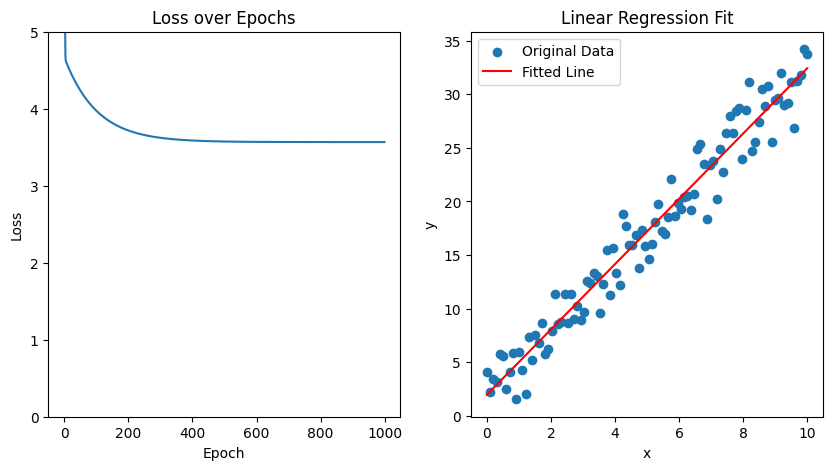

In [147]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
# 1. 입출력 정의
x = torch.linspace(0, 10, 100).view(-1, 1)  # 입력 데이터
# print(x)

y = 3 * x + 2 + torch.randn(100, 1) * 2
# print(y)

# 2. 모델 정의


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


model = LinearRegressionModel()

# 3. 손실함수 정의 => 손실 함수(MSA, MSE, RMSE...) 선택
loss_function = nn.MSELoss()

# 4. 가중치 업데이트 => 경사 하강법 -> 어떤 것을 사용할지 선택
# lr = learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 5. 학습 반복
epochs = 1000
losses = []
for epoch in range(epochs):
    # 기울기 초기화
    optimizer.zero_grad()
    # 예측값에 대한 계산
    outputs = model(x)
    # 손실 계산
    loss = loss_function(outputs, y)
    # 역전파를 진행
    loss.backward()
    # 계산값에 따라 가중치 업데이트
    optimizer.step()

    losses.append(loss.item())

    if (epoch+1) % 100 == 0:
        # print(f"Epoch : [{(epoch+1)}/{epochs}]\nLoss : {loss.item():.4f}\n")
        print(f"Epoch : [{(epoch+1)}/{epochs}], Loss : {loss.item():.4f}")

# 6. 결과 시각화
plt.figure(figsize=(10, 5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)  # 행, 열, 몇 번째 넣을 지
plt.ylim(0, 5)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), label="Fitted Line", color="r")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

## 400번을 50번마다

Epoch [0], Loss:  347.0848
Epoch : [50/400], Loss : 3.8687
Epoch : [100/400], Loss : 3.6291
Epoch : [150/400], Loss : 3.4835
Epoch : [200/400], Loss : 3.3950
Epoch : [250/400], Loss : 3.3412
Epoch : [300/400], Loss : 3.3084
Epoch : [350/400], Loss : 3.2885
Epoch : [400/400], Loss : 3.2764


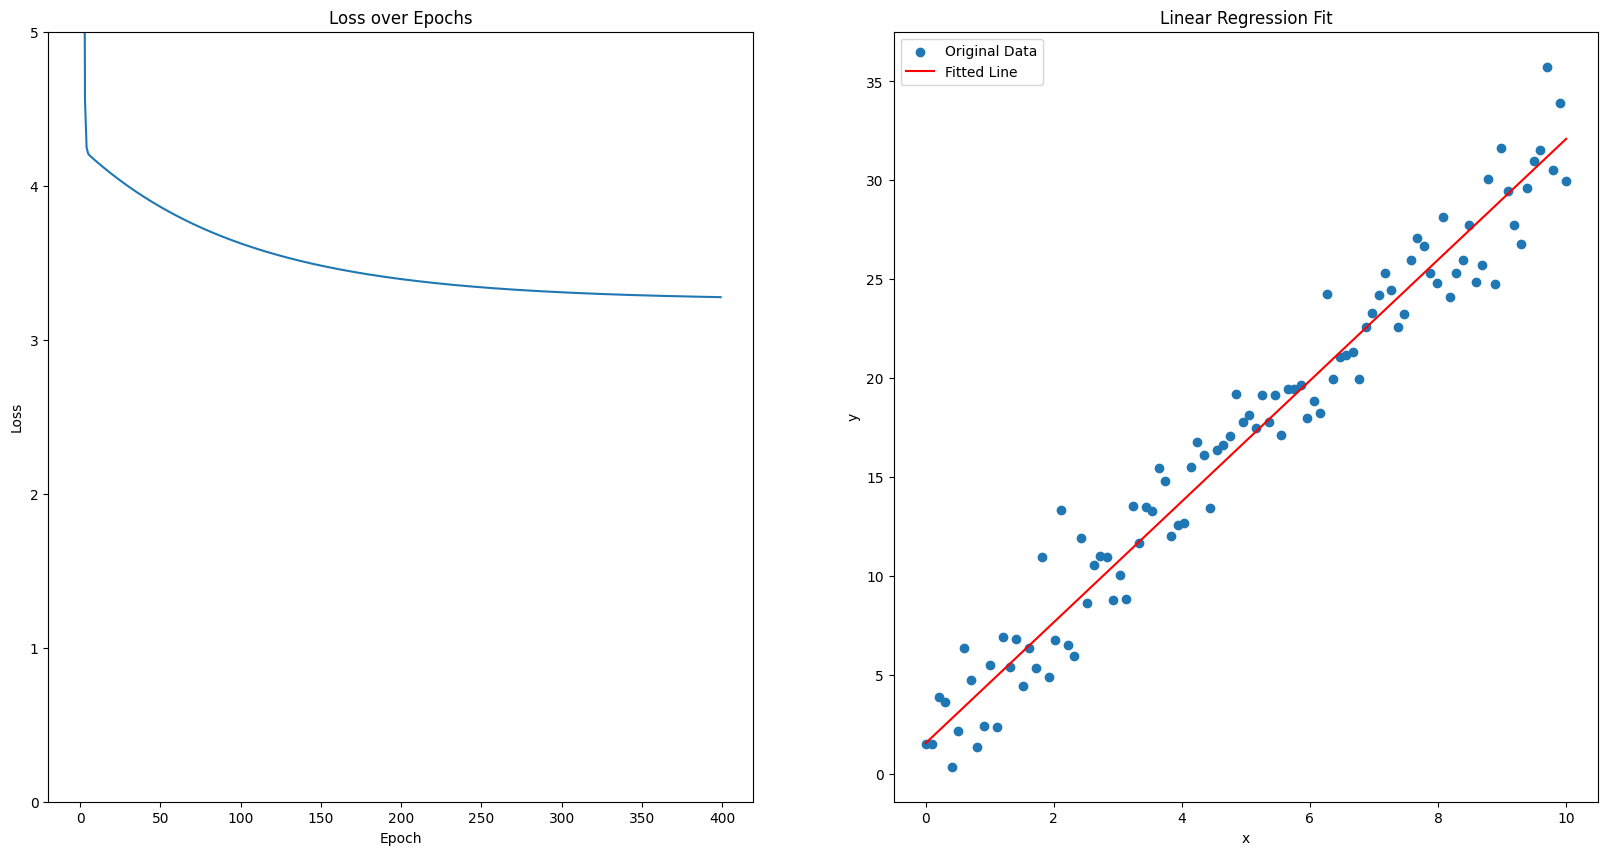

Model parameters
linear.weight : tensor([[3.0539]])
linear.bias : tensor([1.5556])


In [145]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
# 1. 입출력 정의
x = torch.linspace(0, 10, 100).view(-1, 1)  # 입력 데이터
# print(x)

y = 3 * x + 2 + torch.randn(100, 1) * 2
# print(y)

# 2. 모델 정의


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


model = LinearRegressionModel()

# 3. 손실함수 정의 => 손실 함수(MSA, MSE, RMSE...) 선택
loss_function = nn.MSELoss()

# 4. 가중치 업데이트 => 경사 하강법 -> 어떤 것을 사용할지 선택
# lr = learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 5. 학습 반복
epochs = 400
losses = []
for epoch in range(epochs):
    # 기울기 초기화
    optimizer.zero_grad()
    # 예측값에 대한 계산
    outputs = model(x)
    # 손실 계산
    loss = loss_function(outputs, y)
    # 역전파를 진행
    loss.backward()
    # 계산값에 따라 가중치 업데이트
    optimizer.step()

    losses.append(loss.item())
    if epoch == 0:
        print(f"Epoch [{epoch}], Loss: {loss.item(): .4f}")
    if (epoch+1) % 50 == 0:
        # print(f"Epoch : [{(epoch+1)}/{epochs}]\nLoss : {loss.item():.4f}\n")
        print(f"Epoch : [{(epoch+1)}/{epochs}], Loss : {loss.item():.4f}")

# 6. 결과 시각화
plt.figure(figsize=(20, 10))

# 손실 감소 그래프
plt.subplot(1, 2, 1)  # 행, 열, 몇 번째 넣을 지
plt.ylim(0, 5)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), label="Fitted Line", color="r")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

print("Model parameters")
for name, param in model.named_parameters():
    print(f"{name} : {param.data}")